<a href="https://colab.research.google.com/github/arbin34/heruk/blob/main/projectheart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,roc_auc_score,confusion_matrix


In [ ]:
df=pd.read_csv("/content/heart-disease[1].csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


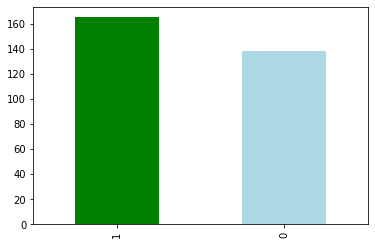

In [ ]:
df.target.value_counts().plot(kind='bar',color=["green", "lightblue"])

In [ ]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


Text(0, 0.5, 'Amount')

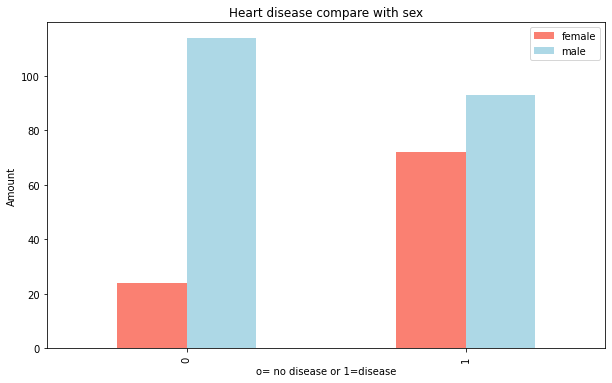

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["salmon", "lightblue"],figsize=(10,6))
plt.title("Heart disease compare with sex")
plt.legend(['female','male'])
plt.xlabel("o= no disease or 1=disease")
plt.ylabel("Amount")

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


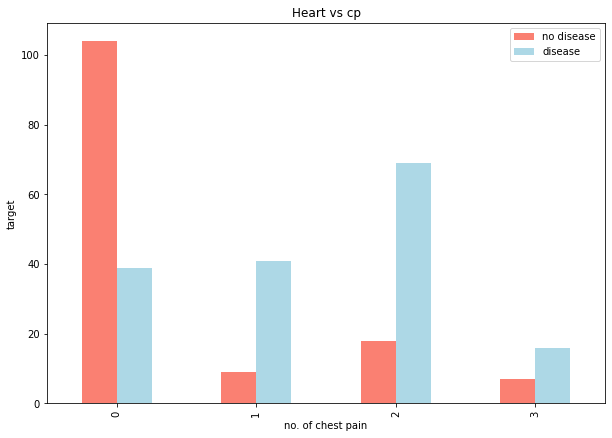

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,7))
plt.title('Heart vs cp')
plt.xlabel("no. of chest pain")
plt.ylabel("target")
plt.legend(['no disease','disease'])

Text(0, 0.5, 'Max Heart Rate')

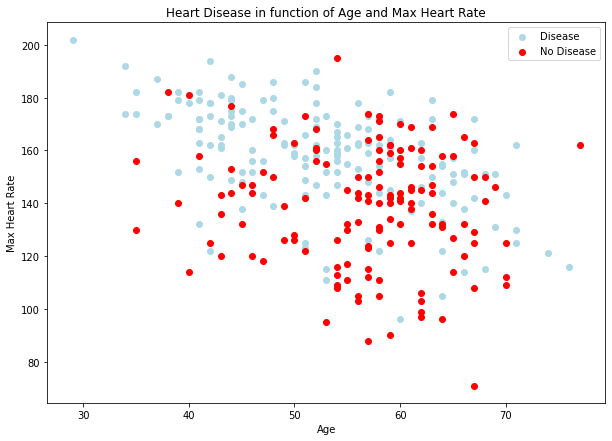

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='lightblue')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='red')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate")



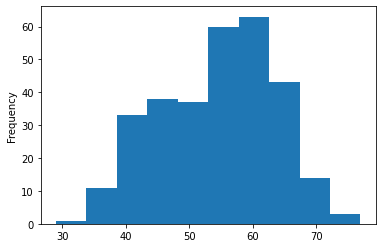

In [ ]:
df.age.plot.hist()

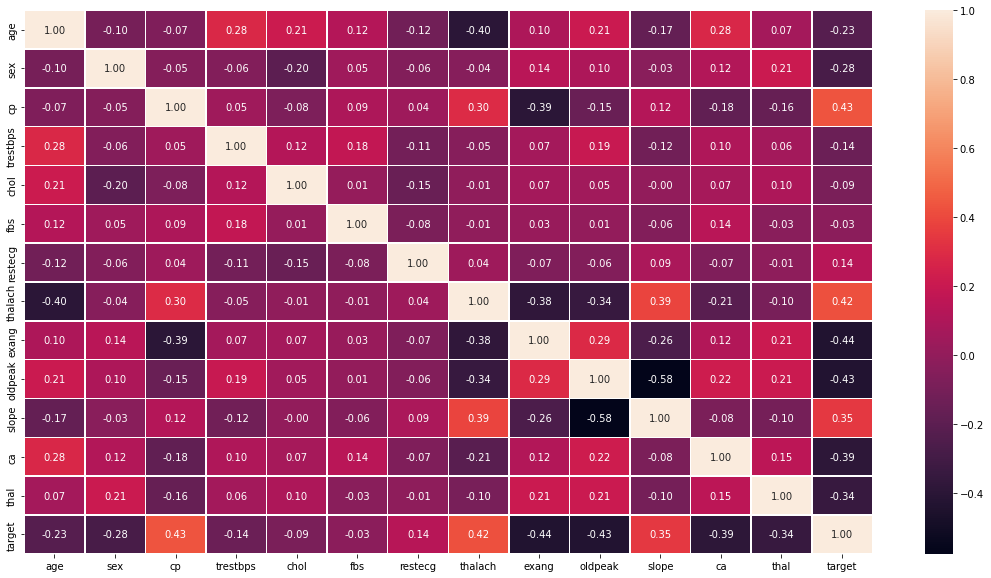

In [ ]:
corr_mettics=df.corr()
plt.figure(figsize=(19, 10))
sns.heatmap(corr_mettics,annot=True,linewidths=0.5,fmt=".2f")

In [ ]:

rt=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=14)
rt.fit(x_train,y_train)
cross=cross_val_score(rt,x,y,cv=5,scoring="accuracy")
np.mean(cross)

0.8381420765027322

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model={'n_estimators':np.arange(10,1000,50),
       "max_depth":[None,5,10],
       'min_samples_split':np.arange(2,10,2),
       'min_samples_leaf':np.arange(1, 20, 2)}

In [ ]:
randomtree=RandomizedSearchCV(RandomForestClassifier(),param_distributions=model,n_iter=10,cv=5)
randomtree.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [ ]:
randomtree.best_params_

{'n_estimators': 810,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': None}

In [ ]:
randomtree.best_score_

0.8634353741496599

##LogisticRegression


In [ ]:
lg=LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)
np.mean(cross_val_score(lg,x,y,scoring='accuracy',cv=5))

0.8315300546448088

In [ ]:
model={'knn':KNeighborsClassifier(),
       'log': LogisticRegression(),
       'rtree':RandomForestClassifier()}

In [ ]:
def fit_train_model(model,x_train,x_test,y_train,y_test):
  model_score={}
  for name,models in model.items():
    models.fit(x_train,y_train)
    model_score[name]=models.score(x_test,y_test)
  return model_score

In [ ]:
fit_train_model(model,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'knn': 0.6065573770491803,
 'log': 0.819672131147541,
 'rtree': 0.7540983606557377}

In [ ]:
model={'C':np.linspace(-3,3,20),
       'solver':[ 'liblinear']}

In [ ]:
r_l=RandomizedSearchCV(LogisticRegression(),param_distributions=model,n_iter=10,cv=5)
r_l.fit(x_train,y_train)



In [ ]:
np.mean(cross_val_score(r_l,x,y,cv=5,scoring='accuracy'))

In [ ]:
r_l.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.4736842105263155}

In [ ]:
r_l.best_score_

0.8430272108843537

##GridSearchCV

In [ ]:
r_l1=GridSearchCV(LogisticRegression(),param_grid=model,cv=5)
randomtree.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [ ]:
r_l1.fit(x_train,y_train)



In [ ]:
r_l1.best_params_

{'C': 1.1052631578947363, 'solver': 'liblinear'}

In [ ]:
r_l1.best_score_

0.8471088435374149

In [ ]:
model1={'n_estimators':np.arange(10,1000,50),
       "max_depth":[None,5,10],
       'min_samples_split':np.arange(2,10,2),
       'min_samples_leaf':np.arange(1, 20, 2)}

In [ ]:
r_l2=GridSearchCV(RandomForestClassifier(),param_grid = model1,cv=5,n_jobs=-1)
r_l2.fit(x_train,y_train)

In [ ]:
r_l2.best_params_

AttributeError: ignored

In [ ]:
r_l2.best_score_

AttributeError: ignored